In [12]:
# Import dependencies. 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  

In [13]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [39]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bolungarvik is
chifeng cn
hovd mn
hasaki jp
tuktoyaktuk ca
tygda ru
vila velha br
port hedland au
ushuaia ar
hobart au
victoria sc
saint george bm
ushuaia ar
new norfolk au
busselton au
hualmay pe
oktyabrskoye ru
kesennuma jp
kodiak us
mys shmidta ru
labytnangi ru
port elizabeth za
valdez ec
cape town za
mataura pf
rikitea pf
bethel us
salalah om
barentsburg sj
shache cn
sistranda no
vaitupu wf
rikitea pf
jamestown sh
ushuaia ar
severo-kurilsk ru
iskateley ru
rikitea pf
kodiak us
cape town za
mount gambier au
khlung th
muros es
faanui pf
port elizabeth za
hilo us
vaini to
krasnoarmeysk kz
bredasdorp za
barrow us
hilo us
kruisfontein za
talnakh ru
college us
kodiak us
albany au
taolanaro mg
ushuaia ar
barrow us
hobart au
blagoyevo ru
punta arenas cl
albany au
husavik is
hihifo to
ushuaia ar
barrow us
thompson ca
albany au
chimoio mz
taolanaro mg
sao filipe cv
busselton au
boromlya ua
georgetown sh
sao filipe cv
alofi nu
ushuaia ar
puerto ayora ec
gebre guracha et
kaitangata nz
nevers fr

In [16]:
# Create a list for holding the cities 
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [17]:
# Import dependencies and initiatize counters and an empty list that will hold the weather data. 

from datetime import datetime
# Import the requests library. 
import requests
# Import the API key.
from config import weather_api_key

# Empty list to hold the weather data
city_data=[]

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d3866c3d6e5aa688198ae7844c10ea9e


In [19]:
# Loop through the cities list. 
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. 
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ecord 23 of Set 4 | camopi
Processing Record 24 of Set 4 | phan thiet
Processing Record 25 of Set 4 | pinega
Processing Record 26 of Set 4 | quatre cocos
Processing Record 27 of Set 4 | saleaula
City not found. Skipping...
Processing Record 28 of Set 4 | qeshm
Processing Record 29 of Set 4 | graaff-reinet
Processing Record 30 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 4 | la ronge
Processing Record 33 of Set 4 | ponta do sol
Processing Record 34 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 4 | yarmouth
Processing Record 36 of Set 4 | ipanguacu
Processing Record 37 of Set 4 | west wendover
Processing Record 38 of Set 4 | riyadh
Processing Record 39 of Set 4 | hermanus
Processing Record 40 of Set 4 | chernyshevskiy
Processing Record 41 of Set 4 | japura
Processing Record 42 of Set 4 | te anau
Processing Record 43 of Set 4 | yerbogachen
Processing Reco

In [20]:
# Convert the array of dictionaries to a Pandas DataFra
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Georges,12.06,-61.75,78.80,83,75,13.87,GD,2020-12-23 09:22:51
1,Margate,51.38,1.39,54.00,94,100,1.01,GB,2020-12-23 09:22:52
2,Porto Novo,6.50,2.60,84.20,83,40,5.82,BJ,2020-12-23 09:22:52
3,Albany,42.60,-73.97,28.00,59,0,1.99,US,2020-12-23 09:22:52
4,Nikolskoye,59.70,30.79,28.99,92,90,13.42,RU,2020-12-23 09:22:52
5,Port Alfred,-33.59,26.89,75.00,86,32,8.01,ZA,2020-12-23 09:22:52
6,Tasiilaq,65.61,-37.64,23.00,57,75,17.22,GL,2020-12-23 09:21:29
7,Chokurdakh,70.63,147.92,-25.13,88,99,7.47,RU,2020-12-23 09:21:38
8,San Quintin,30.48,-115.95,56.59,81,91,5.59,MX,2020-12-23 09:22:53
9,Sibolga,1.74,98.78,83.28,70,100,3.60,ID,2020-12-23 09:22:53


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
555,Providencia,MX,2020-12-23 09:24:24,28.72,-111.58,57.00,54,2,5.35
556,Tabat,ID,2020-12-23 09:24:24,-2.63,115.23,81.05,87,95,4.12
557,Banda Aceh,ID,2020-12-23 09:24:08,5.56,95.32,82.62,73,99,16.75
558,Ginir,ET,2020-12-23 09:24:25,7.13,40.70,71.29,32,55,10.29
559,Gravdal,NO,2020-12-23 09:24:25,68.12,13.50,39.20,69,75,8.05
560,Puerto Del Rosario,ES,2020-12-23 09:24:25,28.50,-13.86,68.00,52,0,25.28
561,Pouembout,NC,2020-12-23 09:24:26,-21.13,164.90,79.00,74,69,4.83
562,Thompson,CA,2020-12-23 09:24:26,55.74,-97.86,-23.80,74,5,4.70
563,Fairlie,GB,2020-12-23 09:24:26,55.76,-4.86,36.00,94,100,11.63
564,Sistranda,NO,2020-12-23 09:21:26,63.73,8.83,42.80,87,75,23.04


In [22]:
# Create the output file (CSV). 
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
city_data_df["Max Temp"].describe()

count    565.000000
mean      50.191522
std       31.806426
min      -48.680000
25%       30.580000
50%       57.870000
75%       76.050000
max      102.880000
Name: Max Temp, dtype: float64

In [24]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

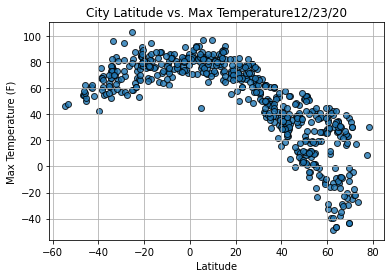

In [25]:
# Import time module

import time

# Build the scatter plot for latitude vs max temp

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show plot. 
plt.show()

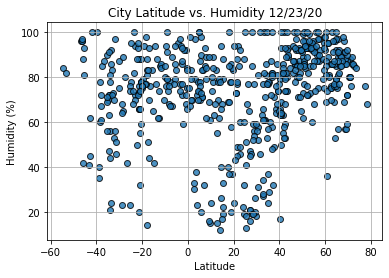

In [26]:
# Build the scatter plot for latitude vs humidity.

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig2.png")

# Show plot. 
plt.show()

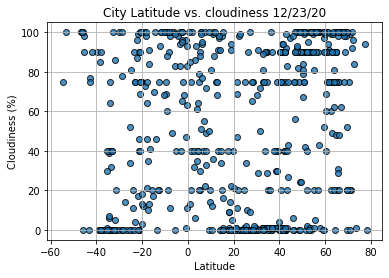

In [27]:
# Build the scatter plot for latitude vs cloudiness.

plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig3.png")

# Show plot. 
plt.show()

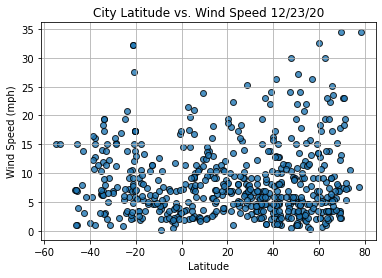

In [28]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show plot. 
plt.show()